# Context
### Problem Statement
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

> Implementing customer segmentation leads to plenty of new business opportunities. You can do a lot of optimization in:

1-Budgeting

2-Product design

3-Promotion

4-Marketing

5-Customer satisfaction

# Objective
Need to perform clustering to summarize customer segments.

# Content
The dataset has been taken from kaggle website. Here is the link

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# Attributes -

## People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if customer complained in the last 2 years, 0 otherwise

# Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

# Place

NumWebPurchases: Number of purchases made through the company’s web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s web site in the last month

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Reading the dataset
df = pd.read_csv('marketing_campaign.csv',sep = ";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis and Data Cleaning

In [64]:
# Checking the shape of the dataset
df.shape

(2240, 29)

In [65]:
# Finding the basic information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [66]:
# Finding the number of unique values present in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [67]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [68]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# Filling the missing value in the income by mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [70]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [71]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [72]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']


In [73]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,0,0,1617,1,22
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,0,2,27,0,4
2,4141,1965,Graduation,relationship,71613.0,2013-08-21,26,0,0,776,0,20
3,6182,1984,Graduation,relationship,26646.0,2014-02-10,26,0,1,53,0,6
4,5324,1981,PhD,relationship,58293.0,2014-01-19,94,0,1,422,0,14


In [74]:
# Adding a column "Age" in the dataframe

df['Age'] = 2015 - df["Year_Birth"]

In [75]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [76]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')
df['Education'] = df['Education'].replace(['Graduation'],'Grad')

In [77]:
df['Edu_label']=df['Education'].map(edu_dict)

In [78]:
df.Education.value_counts()

Grad    1127
PG      1059
UG        54
Name: Education, dtype: int64

In [79]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,Edu_label
0,5524,1957,Grad,Single,58138.0,2012-09-04,58,0,0,1617,1,22,58,1
1,2174,1954,Grad,Single,46344.0,2014-03-08,38,0,2,27,0,4,61,1
2,4141,1965,Grad,relationship,71613.0,2013-08-21,26,0,0,776,0,20,50,1
3,6182,1984,Grad,relationship,26646.0,2014-02-10,26,0,1,53,0,6,31,1
4,5324,1981,PG,relationship,58293.0,2014-01-19,94,0,1,422,0,14,34,2


In [80]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [81]:
df = df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Recency", "Complain"], axis=1)
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,Edu_label,day_engaged
0,Grad,Single,58138.0,0,1617,1,22,58,1,849
1,Grad,Single,46344.0,2,27,0,4,61,1,299
2,Grad,relationship,71613.0,0,776,0,20,50,1,498
3,Grad,relationship,26646.0,1,53,0,6,31,1,325
4,PG,relationship,58293.0,1,422,0,14,34,2,347


# DATA VISUALIZATION

In [82]:
fig = px.bar(df, x='Marital_Status', y='Expenses',color="Marital_Status")
fig.show()

In [83]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status")
fig.show ()

In [84]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education")
fig.show ()

In [85]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education")
fig.show ()

In [86]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status")
fig.show ()

In [87]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status")
fig.show ()

In [88]:
fig =  px.pie (df, names = "Marital_Status")
fig.show ()

In [89]:
fig =  px.pie (df, names = "Education")
fig.show ()

In [90]:
fig = px.bar(df, x='Education', y='Expenses',color="Education")
fig.show()

# Data Transformation

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [92]:
le = LabelEncoder()

In [93]:
# cols = ['Marital_Status', 'Education']

In [94]:
# df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [95]:
edu_dict = {'UG':0,'PG':2,'Grad':1}

In [96]:
df_new = df.copy()
df_new.drop('Education',inplace=True,axis=1)
df_new_1 = pd.get_dummies(df_new)

In [97]:
df_new_1.head()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,Edu_label,day_engaged,Marital_Status_Single,Marital_Status_relationship
0,58138.0,0,1617,1,22,58,1,849,1,0
1,46344.0,2,27,0,4,61,1,299,1,0
2,71613.0,0,776,0,20,50,1,498,0,1
3,26646.0,1,53,0,6,31,1,325,0,1
4,58293.0,1,422,0,14,34,2,347,0,1


In [98]:
df_new.columns

Index(['Marital_Status', 'Income', 'Kids', 'Expenses', 'TotalAcceptedCmp',
       'NumTotalPurchases', 'Age', 'Edu_label', 'day_engaged'],
      dtype='object')

In [99]:
# df.head()

In [100]:
scaled_features = StandardScaler().fit_transform(df_new_1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df_new_1.columns)
scaled_features_df.head()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,Edu_label,day_engaged,Marital_Status_Single,Marital_Status_relationship
0,0.235327,-1.264505,1.679417,0.621248,1.313544,0.985345,-0.825242,1.531185,1.346874,-1.346874
1,-0.235826,1.396361,-0.961275,-0.501912,-1.185022,1.235733,-0.825242,-1.190545,1.346874,-1.346874
2,0.773633,-1.264505,0.282673,-0.501912,1.035926,0.317643,-0.825242,-0.205773,-0.742460,0.742460
3,-1.022732,0.065928,-0.918094,-0.501912,-0.907403,-1.268149,-0.825242,-1.061881,-0.742460,0.742460
4,0.241519,0.065928,-0.305254,-0.501912,0.203070,-1.017761,1.014104,-0.953012,-0.742460,0.742460


# Model Building

In [101]:
from sklearn.cluster import KMeans

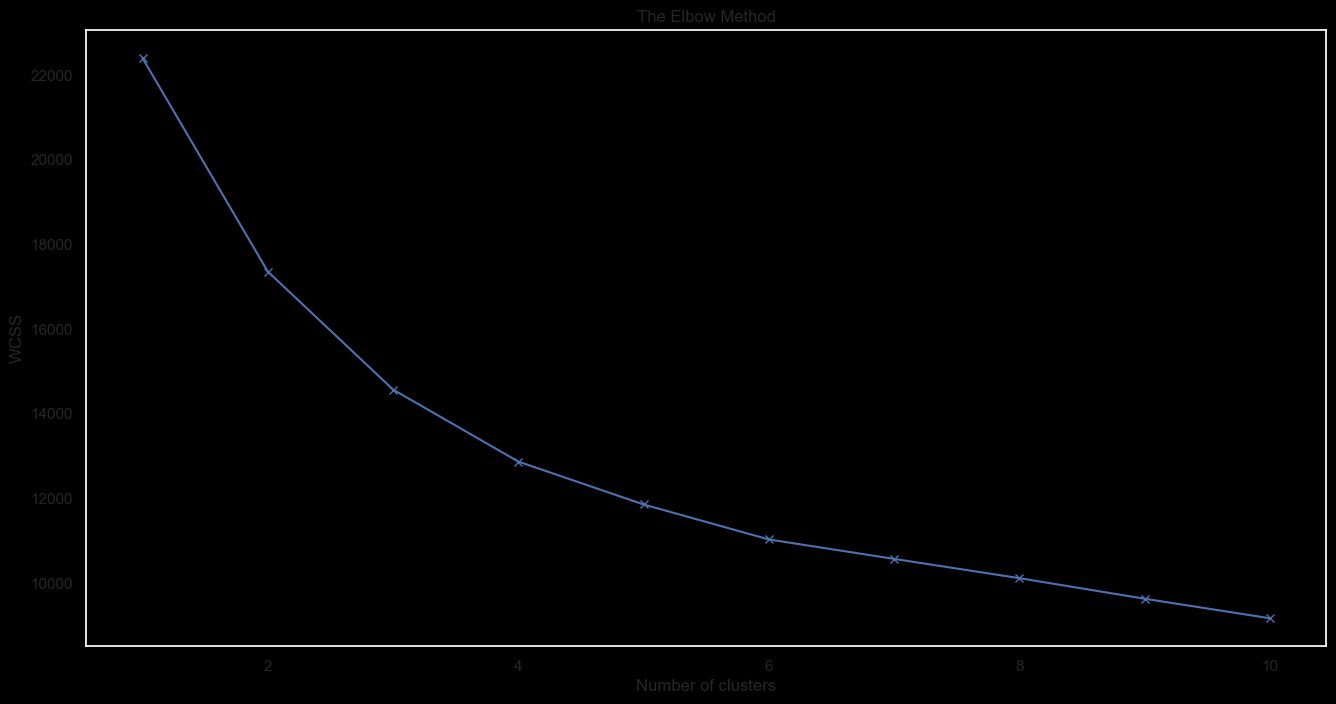

In [102]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i, random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [103]:
from sklearn.metrics import silhouette_score

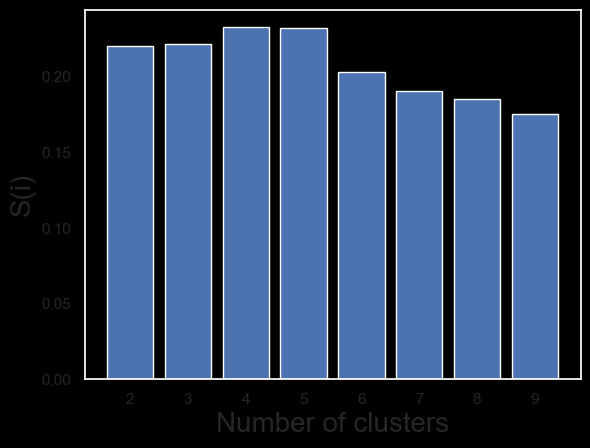

In [104]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df,c)) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [105]:
silhouette_scores

[0.2201174073758656,
 0.2213297917910076,
 0.2324585678238577,
 0.23176701546843534,
 0.2031133331290214,
 0.19005623403319058,
 0.1851866396382983,
 0.17522754515298697]

In [106]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=3, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster'] = pred + 1
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,Edu_label,day_engaged,cluster
0,Grad,Single,58138.0,0,1617,1,22,58,1,849,2
1,Grad,Single,46344.0,2,27,0,4,61,1,299,3
2,Grad,relationship,71613.0,0,776,0,20,50,1,498,2
3,Grad,relationship,26646.0,1,53,0,6,31,1,325,1
4,PG,relationship,58293.0,1,422,0,14,34,2,347,1


# Outcome

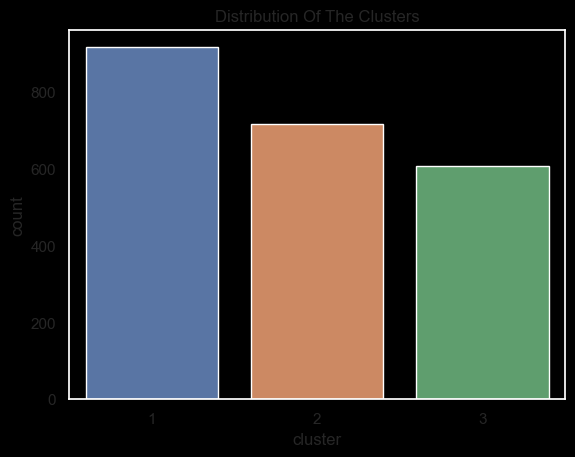

In [107]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

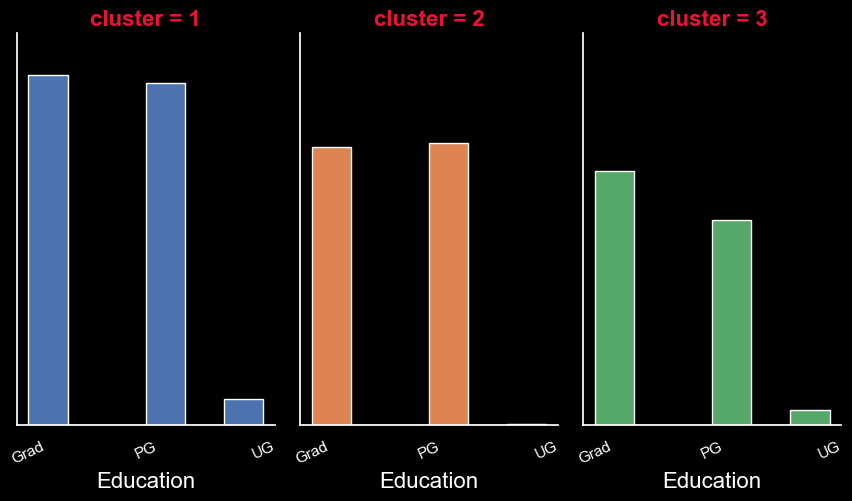

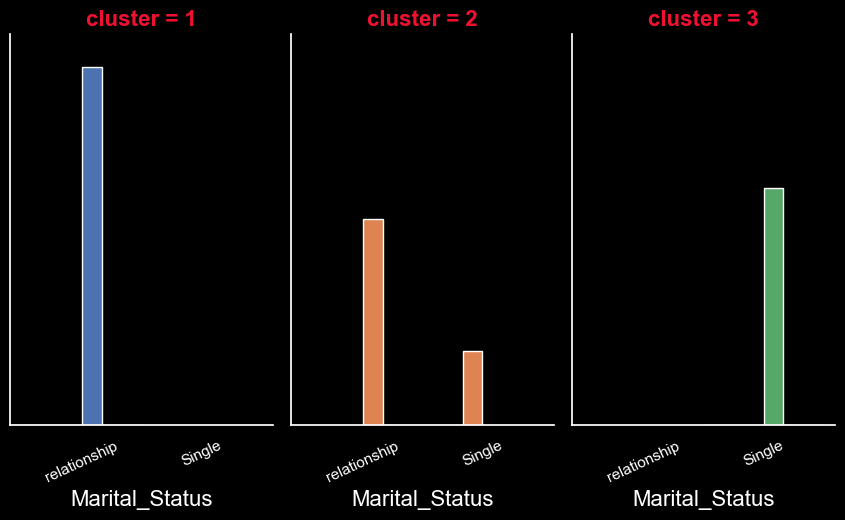

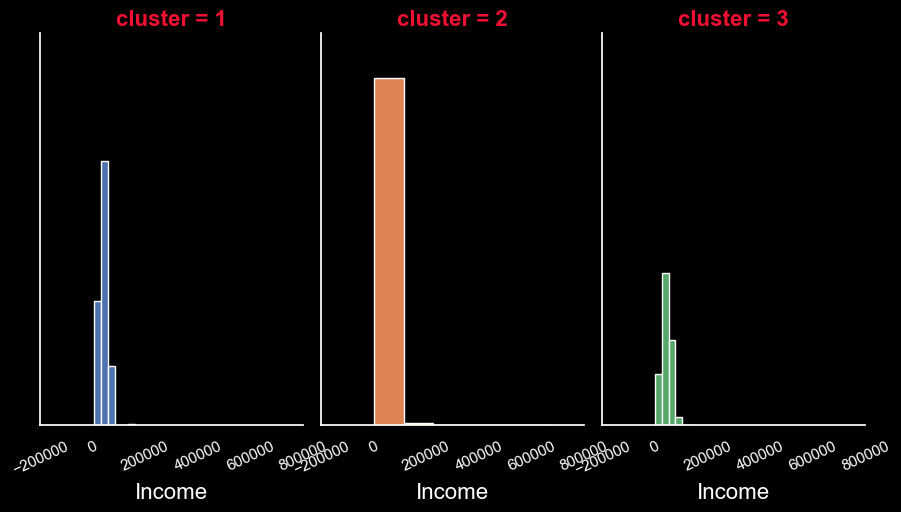

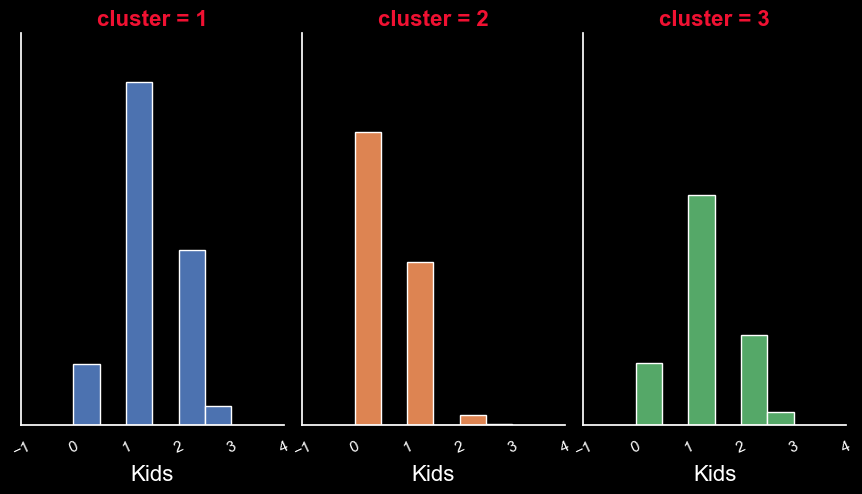

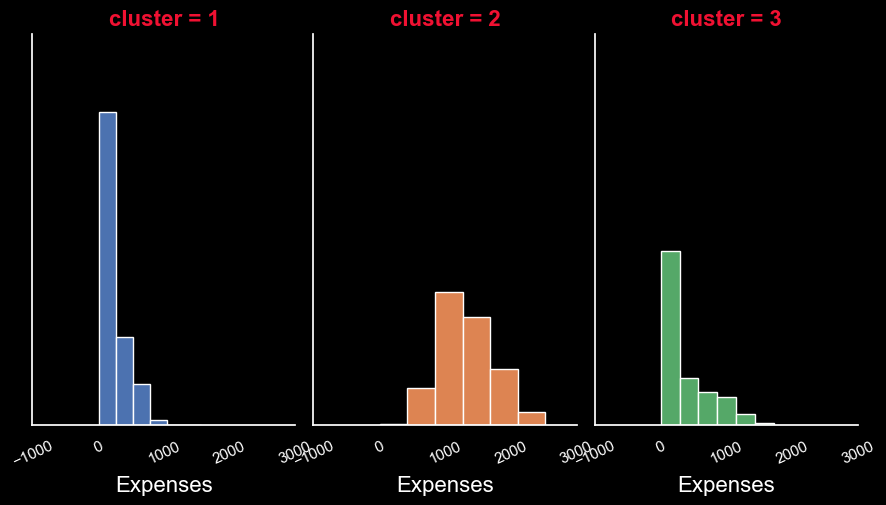

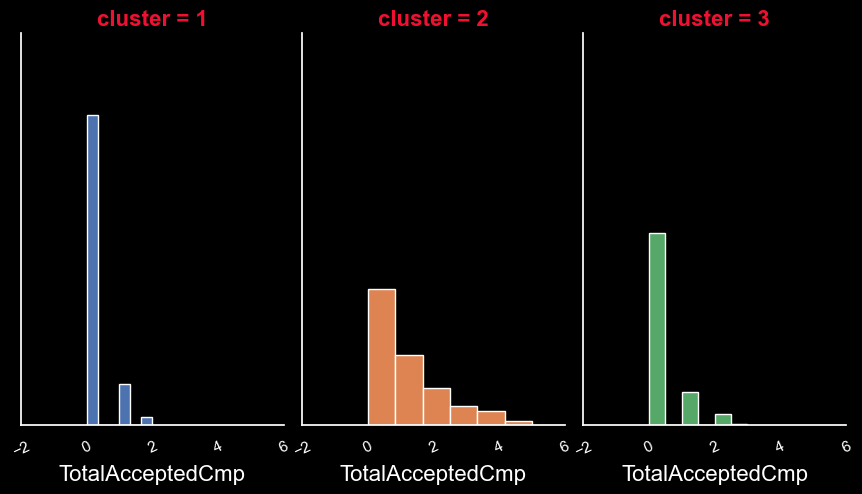

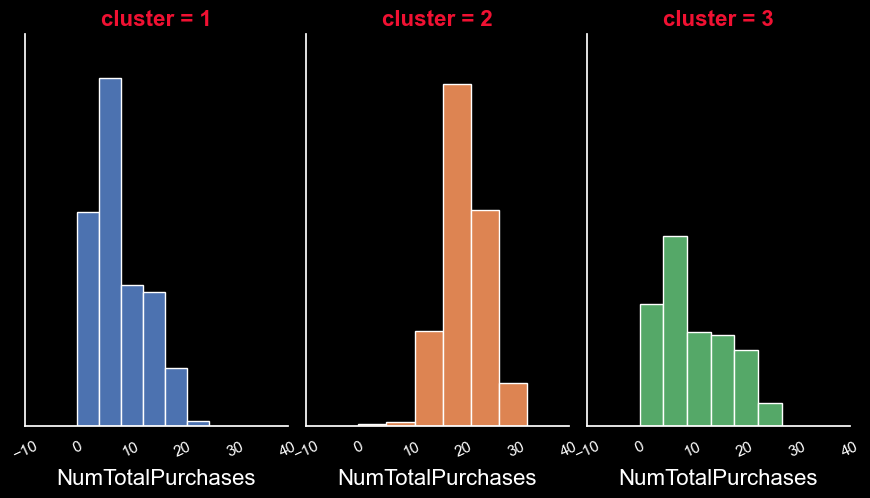

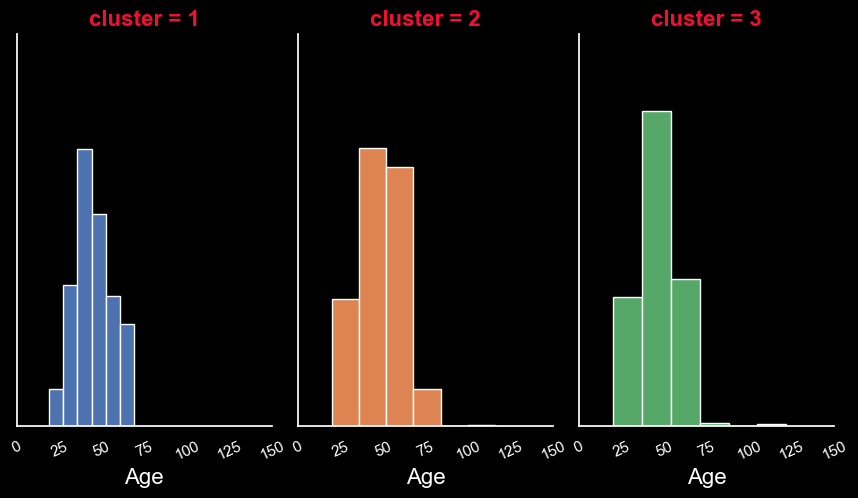

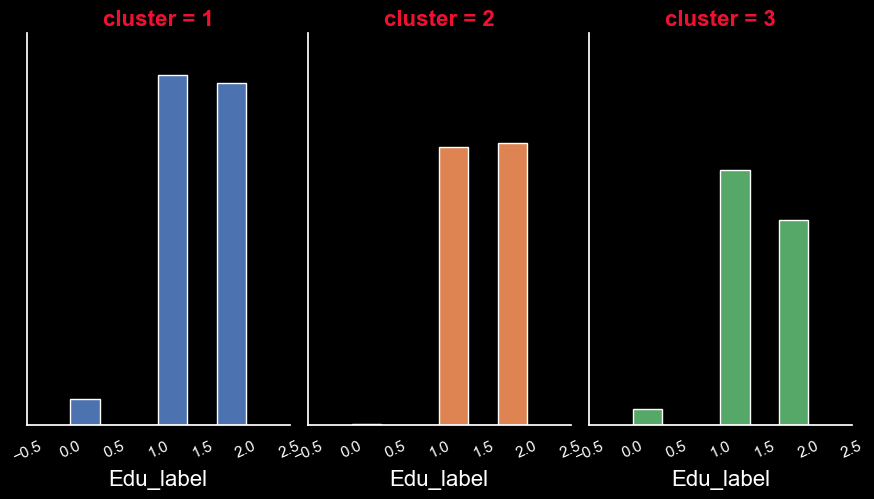

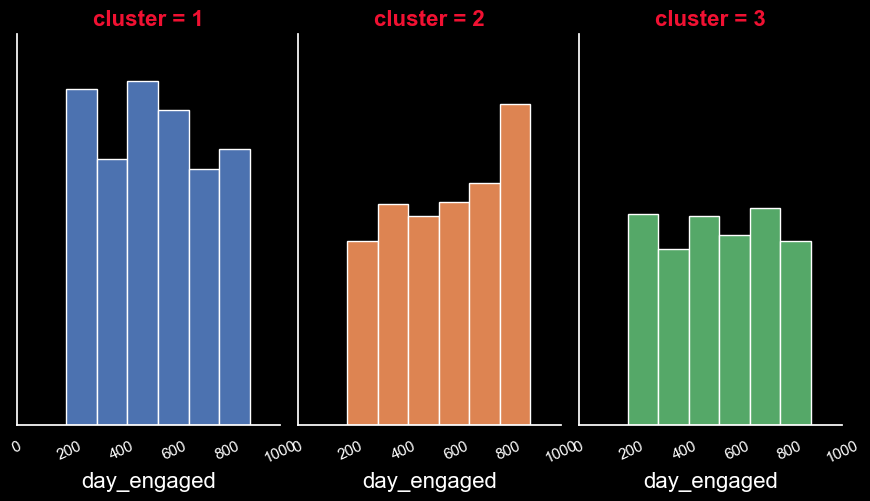

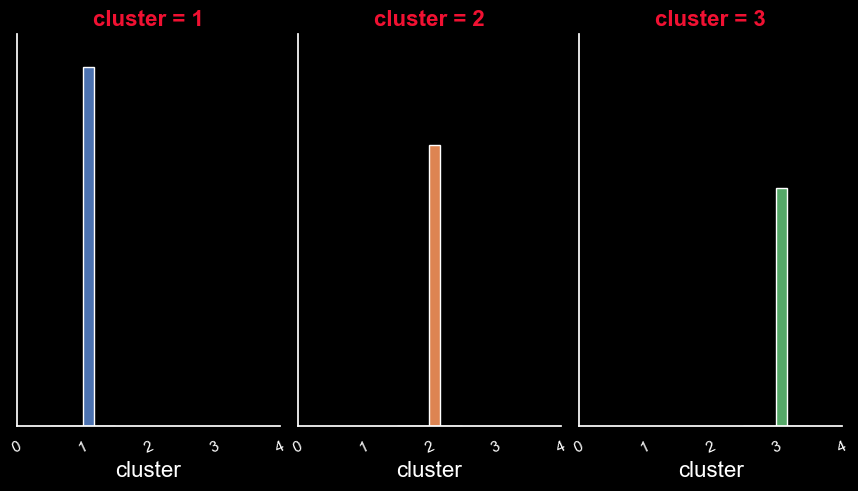

In [108]:
# Clusters interpretation 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster")
    diag.map(plt.hist, i, bins=6) 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

# Project Report
Based on above information we can divide customer into 3 parts:-

Highly Active Customer :- These customers belong to cluster one.

Moderately Active Customer :- These customers belong to cluster two

Least Active Customer :- These customers belong to cluster third.

# Characteristics of Highly Active Customer

> In terms of Education

Highly Active Customer are from PG background.

> In terms of Marital_status

Number of people in relationship are approx. two times of single people

> In terms of Income

Income of Highly active customer are little less as compare to Moderately active customer.

> In terms of Kids

Highly active customer have more number of children as compare to other customer ( avg. of 1 child ).

> In terms of Expenses

Expenses of Highly Active customer are less as compare to moderate.

These customer spent avg. of approx. 100-200 unit money.

> In terms of Age

Age of these customer are between 25 to 75.

Maximum customer age are between 40 to 50.

> In terms of day_engaged

Highly Active customer are more loyal as they engaged with company for longer period of time.

# Characteristics of Moderately Active Customer

> In terms of Education

Moderately Active Customer are also from PG backgroud

> In terms of Marital_status

Number of people in relationship are slightly more as compare to single people

> In terms of Income

Income of Moderately active customer are higher as compare to other customer.

> In terms of Kids

Moderately active customer have less number of childern as compare to highly active customer ( Max. customer has no child ).

> In terms of Expenses

Expenses of Moderately Active customer are more as compare to Active.

These customer spent avg. of approx. 500-2000 unit money.

> In terms of Age

Age of these customer are between 25 to 75.

Maximum customer age are between 35 to 60.

> In terms of day_engaged

Moderately Active customer are slightly less engaged with company as compare to Highly Active Customer.

# Characteristics of Least Active Customer

> In terms of Education

Least Active Customer are from UG backgroud

> In terms of Marital_status

Number of people in relationship are approx. equal to single people

> In terms of Income

Income of Least active customer are very less or say negligible.

> In terms of Kids

Only few of these customer have child.

> In terms of Expenses

Expenses of Least Active customer are very less or say negligible.

> In terms of Age

Age of these customer are between 15 to 30.

> In terms of day_engaged

Least Active customer are not much enrolled with company for longer time.

# As siluhatte score is below 0.25 we should use another clusteriing

# Range of SC	Interpretation

0.71-1.0-->A strong structure has been found

0.51-0.70-->A reasonable structure has been found

0.26-0.50-->The structure is weak and could be artificial

< 0.25-->No substantial structure has been found

# Further we can apply hierarchical clustering (simple linkage and complex linkage) and we can visualize¶

In [109]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt